# Анализ рынка заведений общественного питания в Москве

- Автор: Мария 
- Дата: 15.01.2026

### Цели и задачи проекта

**Цель проекта**  
Провести исследовательский анализ рынка общественного питания Москвы и подготовить рекомендации по открытию нового заведения (формат, локация, ценовое позиционирование).

**Ключевые задачи:**
- Оценить структуру рынка и насыщенность по типам заведений  
- Проанализировать географическое распределение объектов и выявить наиболее/наименее конкурентные районы  
- Изучить ценовые сегменты, средний чек и ассортимент основных конкурентов  
- Определить перспективные локации с учётом плотности населения, трафика и конкуренции  
- Сформулировать конкретные рекомендации по концепции, формату и позиционированию нового заведения

### Описание данных

Датасет `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — `5.0`);
- `chain` — число, выраженное `0` или `1`, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - `0` — заведение не является сетевым
  - `1` — заведение является сетевым
- `seats` — количество посадочных мест.

Датасет `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: 
    - «Средний счёт: 1000–1500 ₽»; 
    - «Цена чашки капучино: 130–220 ₽»; «Цена бокала пива: 400–600 ₽». и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»: 
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений. 
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число. 
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»: 
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений. 
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число. 
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

- [1. Загрузка данных и знакомство с ними](#step1):
    * [Промежуточный вывод](#step1_1)
    * [Подготовка единого датафрейма](#step1_1)
- [2. Предобработка данных](#step2):
    * [Промежуточный вывод](#step2_1)
- [3. Исследовательский анализ данных](#step3):
    * [Задача 1](#step3_1)
    * [Задача 2](#step3_2)
    * [Задача 3](#step3_3)
    * [Задача 4](#step3_4)
    * [Задача 5](#step3_5)
    * [Задача 6](#step3_6)
    * [Задача 7](#step3_7)
    * [Задача 8](#step3_8)
    * [Промежуточный вывод](#step3_9)
- [4. Итоговый вывод и рекомендации](#step4)

---

<a id="step1"></a>
## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
!pip install phik

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

In [3]:
rest_info_df = pd.read_csv('/datasets/rest_info.csv')
rest_price_df = pd.read_csv('/datasets/rest_price.csv')

Загрузка необходимых библиотек и датасетов.

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Датасет `rest_info_df` содержит 8406 строк и 9 колонок/полей, в данных есть пропуски. 

In [6]:
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [7]:
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


Датасет `rest_price_df` содержит 4058 строк и 5 столбцов, в данных есть пропуски. 

---
<a id="step1_1"></a>
### Промежуточный вывод

Датасет `rest_info_df` содержит **8406 записей** и **9 столбцов** с основной информацией о заведениях общепита Москвы.

**Структура и типы данных**  
- Названия столбцов приведены к нижнему регистру без пробелов — это удобно и соответствует хорошим практикам.  
- Оптимизация типов (рекомендации):  
  - `chain` → привести к `int8` (бинарный признак 0/1)  
  - `seats` → преобразовать в `Int32` (целочисленное количество мест, допускает пропуски)  
  - `rating` → снизить до `float32` (достаточная точность для рейтинга)  

**Пропуски**  
- Основные пропуски сосредоточены в `seats` (самый большой объём) и `hours`.  
- В остальных столбцах явных NaN нет, но рекомендуется дополнительно проверить наличие скрытых индикаторов отсутствия данных (пустые строки, '-', 'нет информации' и т.п.).

**Соответствие описанию**  
Значения в столбцах логичны и полностью соответствуют заявленной структуре датасета.

Датасет `rest_price_df` содержит **4058 записей** и **5 столбцов** с информацией о среднем чеке и ценах отдельных позиций.

**Структура и типы данных**  
- Названия столбцов корректны, типы данных соответствуют содержимому (числовые — float, текстовые — object).  
- Рекомендации по оптимизации:  
  - `middle_avg_bill` → `float32`  
  - `middle_coffee_cup` → `float32`  

**Пропуски**  
- Пропуски присутствуют почти во всех столбцах, кроме `id`.  
- Наибольшее количество — в `middle_coffee_cup`: это ожидаемо, так как цена капучино указана не для всех заведений (данные извлекались по шаблонам).  
- Пропуски в `middle_avg_bill` также связаны с ограничениями парсинга строк.

**Соответствие описанию**  
Данные сформированы в соответствии с правилами, описанными в документации.

**Общий вывод**  
Оба датасета имеют хорошее качество и пригодны для дальнейшего анализа. Основные слабые места — пропуски в `seats`, `hours`, `middle_avg_bill` и особенно `middle_coffee_cup`. На следующем этапе планирую:  
- проверить скрытые пропуски (пустые строки, специальные значения)  
- принять решение по обработке пропусков (оставить / заполнить медианой по типу заведения / создать флаги known)  
- объединить датасеты по `id` для комплексного анализа

<a id="step1_2"></a>
### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [8]:
df = rest_info_df.merge(rest_price_df, on='id', how='left')

In [9]:
df_original = df.copy()

In [10]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Датасеты `rest_info_df` (8406 строк) и `rest_price_df` (4058 строк) были объединены по ключу `id` методом left join.

<a id="step2"></a>
## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [12]:
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [13]:
df.chain.value_counts()

0    5201
1    3205
Name: chain, dtype: int64

In [14]:
df['chain'] = df['chain'].astype('int8')
df['seats'] = df['seats'].astype('Int32')

for col in ['rating','middle_avg_bill','middle_coffee_cup']:
    df[col] = pd.to_numeric(df[col], downcast='float', errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   Int32  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: Int32(1), float32(3), int8(1), object(8)
memory usage: 738.8+ KB


Типы данных скорректированы:
- `chain` → `int8` (экономия памяти),
- `seats` → `Int32` (поддержка NaN),
- Оценки и средние чеки → `float` через `pd.to_numeric`.

Теперь данные имеют логически корректные типы и готовы к анализу.

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [16]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=True)

if missing.empty:
    print("Пропусков в данных нет — всё чисто!")
else:
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': missing,
        'Процент пропусков': (missing / len(df)).round(4)
    })
    display(missing_stats.style
            .background_gradient(cmap='coolwarm')
            .format({'Процент пропусков': '{:.2%}'}))

,Кол-во пропусков,Процент пропусков
hours,536,6.38%
seats,3611,42.96%
avg_bill,4590,54.60%
price,5091,60.56%
middle_avg_bill,5257,62.54%
middle_coffee_cup,7871,93.64%


В датафрейме пропуски обнаружены в 6 столбцах. Ниже — количество, доля и обоснование для каждого:

1. **hours** — 536 пропусков (6.4%)  
   **Гипотеза**: режим работы не указан в карточке заведения или отсутствовал в исходном источнике.  
   **Решение**: оставляем как NaN — восстановить невозможно без дополнительных данных.

2. **seats** — 3611 пропусков (43.0%)  
   **Гипотеза**: у значительной части заведений (кофе с собой, киоски, фудтраки, точки выдачи) посадочных мест объективно нет.  
   **Решение**: оставляем пропуски — искусственное заполнение (0 или медиана) исказит картину.

3. **price** — 5091 пропуск (60.6%)  
   **Гипотеза**: ценовая категория (₽₽₽ и т.п.) не заполнена в источнике.  
   **Решение**: оставляем как есть — нет надёжного способа восстановления.

4. **avg_bill** — 4590 пропусков (54.6%)  
   **Гипотеза**: текстовое поле со средним чеком либо пустое, либо не соответствует шаблону парсинга.  
   **Решение**: оставляем пропуски.

5. **middle_avg_bill** — 5257 пропусков (86.8%)  
   **Гипотеза**: значение не удалось извлечь из-за отсутствия шаблона «Средний счёт ... руб.» или полного отсутствия информации.  
   **Решение**: оставляем как NaN — это отражает реальное состояние данных.

6. **middle_coffee_cup** — 7871 пропуск (93.6%)  
   **Гипотеза**: цена капучино указана только в кофейнях и не указывается в большинстве других форматов заведений.  
   **Решение**: оставляем пропуски — заполнять нет оснований.

**Общее решение по пропускам**  
Все пропуски оставлены в виде NaN.  
Заполнение медианой/средним/0 или удаление строк привело бы к сильному искажению картины рынка (особенно по `seats` и ценовым показателям). Пропуски несут смысловую нагрузку — они показывают, где информация реально отсутствует у бизнеса. 

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [17]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют. 

In [18]:
for i in ['name', 'address']:
    df[i] = df[i].str.lower().str.strip()

In [19]:
df[df.duplicated(subset=['name', 'address'], keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,<NA>,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,<NA>,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276,NaN,NaN,NaN,NaN


In [20]:
df = df.drop_duplicates(subset=['name', 'address'])

In [21]:
df.duplicated().sum()

0

В результате выявлено и удалено **4 неявных дубликата** — строки с одинаковым названием и адресом.
Удаление этих строк позволило избежать искажения при группировке и анализе долей по типам заведений.

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [22]:
def is_24_7_func(row):
    return 'круглосуточно' in str(row) and 'ежедневно' in str(row)

In [23]:
df['is_24_7'] = df['hours'].apply(is_24_7_func)

In [24]:
df.tail()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN,True
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,kebab time,кафе,"москва, россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",3.9,0,12,NaN,NaN,NaN,NaN,True


In [25]:
df['is_24_7'].value_counts()

False    7672
True      730
Name: is_24_7, dtype: int64

Анализ графика работы показал, что лишь 8.7% заведений (730 из 8 406) работают круглосуточно и ежедневно.  
Подавляющее большинство — 91.3% — имеют ограниченный режим.  

---
<a id="step2_1"></a>
### Промежуточный вывод

В процессе подготовки датасета выполнены следующие ключевые шаги:

1. **Обработка пропусков**  
   Пропуски оставлены без изменений во всех столбцах — это позволяет сохранить реальную картину данных и избежать искусственного искажения.  
    - `hours` — ~6,4% пропусков (не критично для основных выводов проекта)  
    - `seats`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` и др. — высокая доля пропусков (от 43% до 94%), отражает объективное отсутствие информации в источнике.

2. **Оптимизация типов данных**  
    - `chain` приведён к `int8` (бинарный признак 0/1).
    - `seats` → `Int32` (поддержка NaN),
    - Оценки и средние чеки → `float` через `pd.to_numeric`.

3. **Работа с дубликатами**  
   Проверены явные и неявные дубликаты (по комбинации название + адрес).  
   Удалено **4 неявных дубликата** (после нормализации строк и удаления лишних пробелов).

4. **Создание новых признаков**  
   Добавлен бинарный столбец `is_24_7`:  
   - `True` — заведение работает круглосуточно.  
   - `False` — любой другой режим работы или пропуск.

После этих шагов датасет стал чище, экономичнее по памяти и готов к исследовательскому анализу. Основные искажения исключены, пропуски осознанно сохранены как значимая информация.

<a id="step3"></a>
## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---
<a id="step3_1"></a>
### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [26]:
category_df = df['category'].value_counts(ascending=False).reset_index()
category_df.columns = ['category', 'count']
category_df['fraction'] = df['category'].value_counts(normalize=True).values
category_df




,category,count,fraction
0,кафе,2376,0.282790
1,ресторан,2042,0.243037
2,кофейня,1413,0.168174
3,"бар,паб",764,0.090931
4,пиццерия,633,0.075339
5,быстрое питание,603,0.071769
6,столовая,315,0.037491
7,булочная,256,0.030469


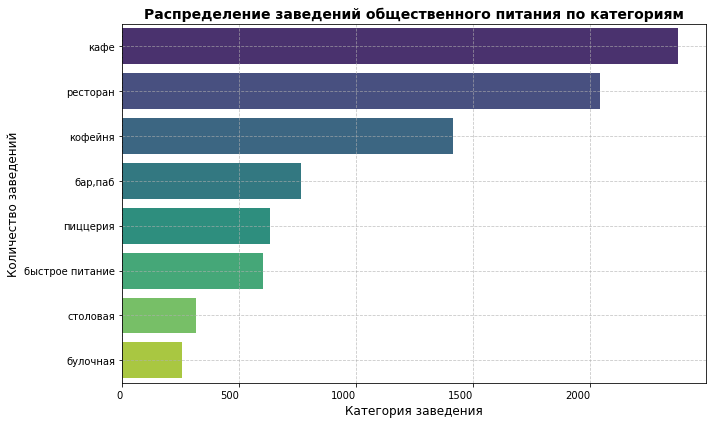

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(y='category', x='count', data=category_df, palette='viridis')
plt.title('Распределение заведений общественного питания по категориям', fontsize=14, fontweight='bold')
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=0, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Анализ показал, что лидирующие позиции занимают **кафе**, **рестораны** и **кофейни** — эти три категории формируют тройку лидеров рынка общественного питания Москвы. На них приходится значительная доля всех заведений, что указывает на высокую концентрацию в сегментах «быстрого» и «среднего» питания.

---
<a id="step3_2"></a>
### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [28]:
district_df = df['district'].value_counts(ascending=False).reset_index()
district_df.columns = ['district', 'count']
district_df['fraction'] = df['district'].value_counts(normalize=True).values
district_df

,district,count,fraction
0,Центральный административный округ,2242,0.266841
1,Северный административный округ,898,0.106879
2,Южный административный округ,892,0.106165
3,Северо-Восточный административный округ,890,0.105927
4,Западный административный округ,850,0.101166
5,Восточный административный округ,798,0.094977
6,Юго-Восточный административный округ,714,0.084980
7,Юго-Западный административный округ,709,0.084385
8,Северо-Западный административный округ,409,0.048679


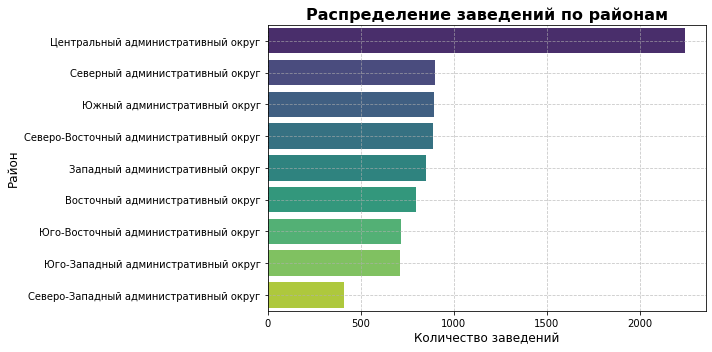

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(y='district', x='count',data=district_df, palette='viridis')
plt.title('Распределение заведений по районам', fontsize=16, fontweight='bold')
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Район', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Ключевые наблюдения по округам**

Концентрация заведений общепита крайне неравномерна:  
- **ЦАО** — 2242 заведения (доминирующая доля рынка).  
- **СЗАО** — всего 409 заведений (самый низкий показатель).  
- В остальных 7 округах — 709–900 заведений (сравнительно ровный уровень).

In [30]:
category_cao_df = (
    df[df['district'] == 'Центральный административный округ']['category']
    .value_counts(ascending=False)
    .reset_index()
)
category_cao_df.columns = ['category', 'count']
category_cao_df['fraction'] = (
    df[df['district'] == 'Центральный административный округ']['category']
    .value_counts(normalize=True)
    .values
)
category_cao_df

,category,count,fraction
0,ресторан,670,0.298840
1,кафе,464,0.206958
2,кофейня,428,0.190901
3,"бар,паб",364,0.162355
4,пиццерия,113,0.050401
5,быстрое питание,87,0.038805
6,столовая,66,0.029438
7,булочная,50,0.022302


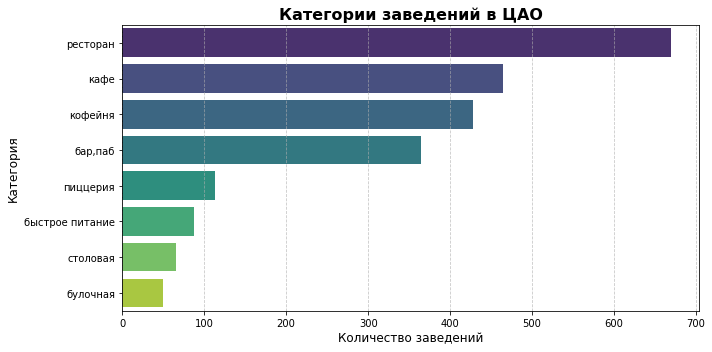

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(y='category', x='count', data=category_cao_df, palette='viridis')
plt.title('Категории заведений в ЦАО', fontsize=16, fontweight='bold')
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Категория', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ЦАО — абсолютный лидер по количеству заведений общепита (более чем в 2 раза больше, чем в любом другом округе).  
Структура топ-категорий в ЦАО идентична общей по Москве: рестораны → кафе → кофейни.

---
<a id="step3_3"></a>
### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [32]:
chain_df = df['chain'].value_counts(ascending=False).reset_index()
chain_df.columns = ['chain', 'count']
chain_df['fraction'] = df['chain'].value_counts(normalize=True).values
chain_df['chain'] = chain_df['chain'].replace({0: 'Несетевые', 1: 'Сетевые'})
chain_df

,chain,count,fraction
0,Несетевые,5199,0.618781
1,Сетевые,3203,0.381219


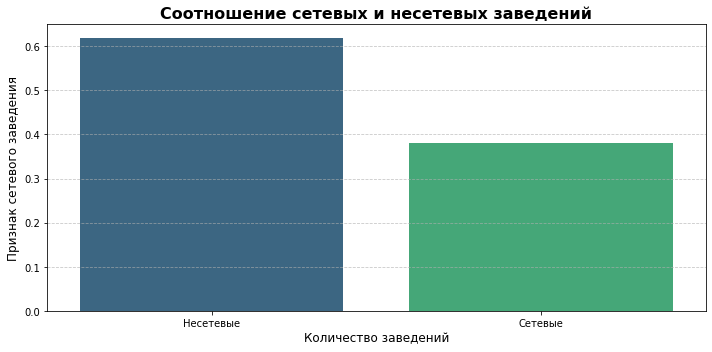

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x='chain', y='fraction', data=chain_df, palette='viridis')
plt.title('Соотношение сетевых и несетевых заведений', fontsize=16, fontweight='bold')
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Признак сетевого заведения', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
category_chain_counts = (
    df.groupby(['category', 'chain'])['id']
    .count()
    .reset_index()
)
category_totals = category_chain_counts.groupby('category')['id'].transform('sum')
category_chain_counts['fraction'] = category_chain_counts['id'] / category_totals
category_chain_df = (
    category_chain_counts[category_chain_counts['chain'] == 1]
    .loc[:, ['category', 'id', 'fraction']]
    .rename(columns={'id': 'count'})
    .sort_values(by='fraction', ascending=False)
)
category_chain_df

,category,count,fraction
3,булочная,157,0.613281
11,пиццерия,330,0.521327
9,кофейня,720,0.509554
5,быстрое питание,232,0.384743
13,ресторан,729,0.357003
7,кафе,779,0.327862
15,столовая,88,0.279365
1,"бар,паб",168,0.219895


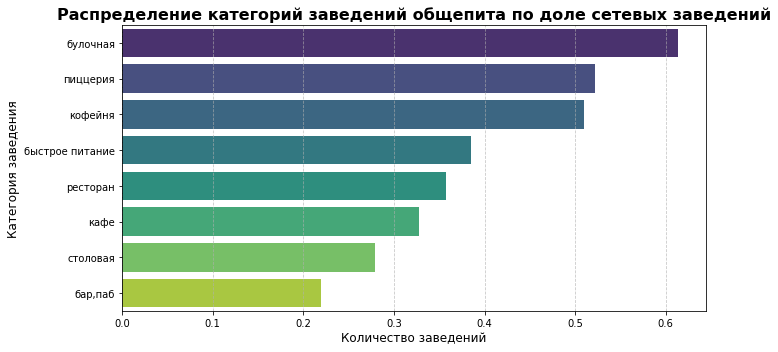

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(y='category', x='fraction', data=category_chain_df, palette='viridis')
plt.title('Распределение категорий заведений общепита по доле сетевых заведений', fontsize=16, fontweight='bold')
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Категория заведения', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Доля сетевых заведений по категориям**

По доле сетевых форматов лидируют:

- **Булочные** — ≈61%  
- **Пиццерии** — ≈52%  
- **Кофейни** — ≈50%

Эти категории — самые «сетевые» на рынке Москвы.  
Высокая доля сетей объясняется стандартизацией продукта, узнаваемостью бренда и относительно низкими затратами на масштабирование.

---
<a id="step3_4"></a>
### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [36]:
df.seats.describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

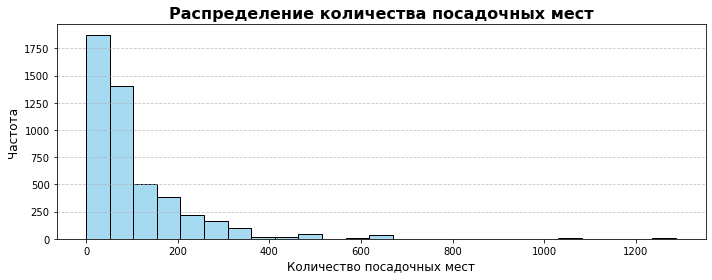

In [37]:
plt.figure(figsize=(10, 4))
sns.histplot(df['seats'], bins=25, color='skyblue')
plt.title('Распределение количества посадочных мест', fontsize=16, fontweight='bold')
plt.xlabel('Количество посадочных мест', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

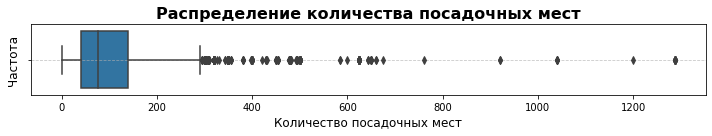

In [38]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['seats'])
plt.title('Распределение количества посадочных мест', fontsize=16, fontweight='bold')
plt.xlabel('Количество посадочных мест', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Частота', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Среднее количество посадочных мест — 108, медиана — 75.  
Значительное расхождение указывает на правостороннюю асимметрию и наличие выбросов в столбце `seats`.

Выбросы реальны: крупные рестораны, банкетные залы и фуд-корты в ТЦ часто имеют 300–1000+ мест — это не ошибки данных.

Для анализа типичного размера заведения лучше использовать **медиану** — она устойчива к экстремальным значениям и лучше отражает большинство объектов.

Распределение скошено вправо: большинство заведений компактные (медиана 75), но крупные объекты сильно тянут среднее вверх.

In [39]:
seats_category = df.groupby('category')['seats'].describe().sort_values(by='50%', ascending=False)
seats_category

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
ресторан,1269.0,121.892041,123.792216,0.0,48.0,86.0,150.0,1288.0
"бар,паб",467.0,124.477516,145.162278,0.0,48.0,82.0,148.5,1288.0
кофейня,751.0,111.199734,127.837772,0.0,40.0,80.0,144.0,1288.0
столовая,164.0,99.750000,122.951453,0.0,40.0,75.5,117.0,1200.0
быстрое питание,349.0,98.891117,106.611739,0.0,28.0,65.0,140.0,1040.0
кафе,1217.0,97.365653,117.922464,0.0,35.0,60.0,120.0,1288.0
пиццерия,427.0,94.496487,112.282703,0.0,30.0,55.0,120.0,1288.0
булочная,148.0,89.385135,97.685844,0.0,25.0,50.0,120.0,625.0


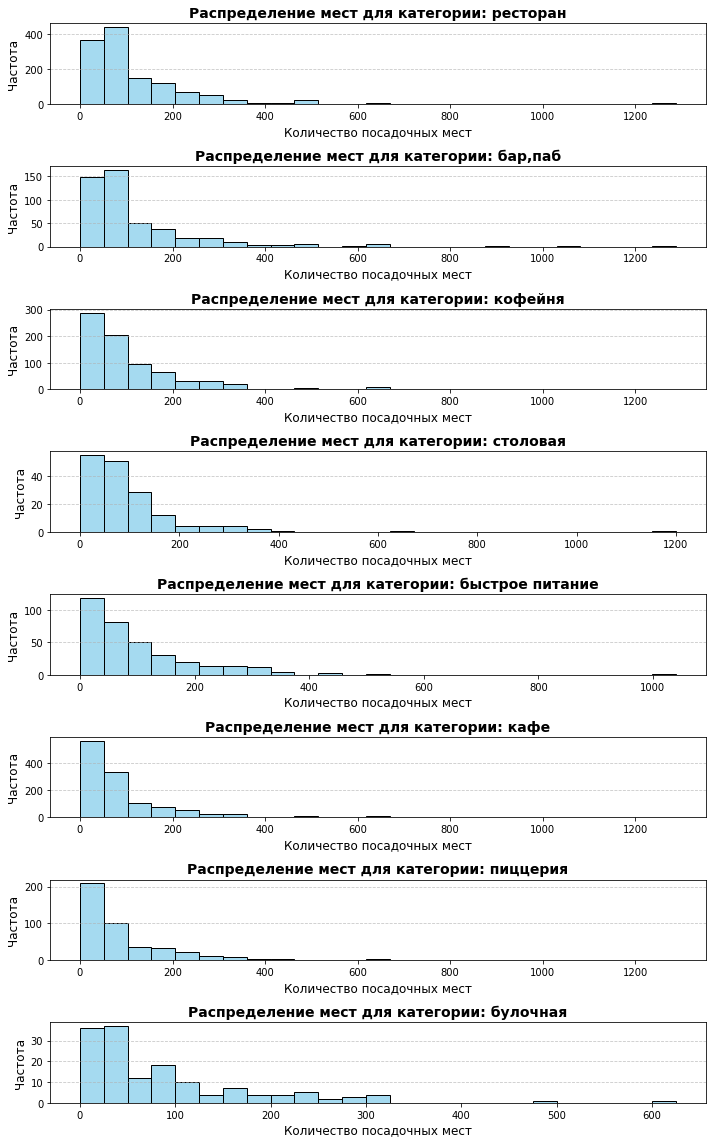

In [40]:
n_cols = len(seats_category.index)
fig, axes = plt.subplots(n_cols, 1, figsize=(10, 2 * n_cols))
if n_cols == 1:
    axes = [axes]

for i, col in enumerate(seats_category.index):
    ax = axes[i]
    sns.histplot(df[df['category'] == col]['seats'], bins=25, color='skyblue', ax=ax)
    ax.set_title(f'Распределение мест для категории: {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Количество посадочных мест', fontsize=12)
    ax.set_ylabel('Частота', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()

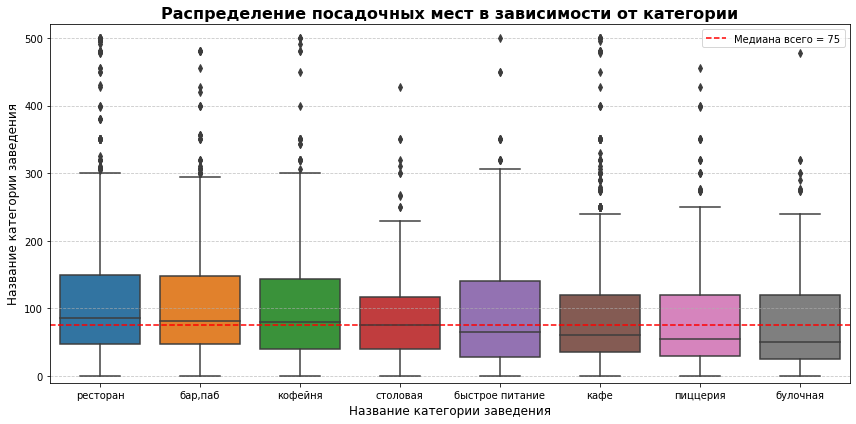

In [41]:
order = df.groupby('category')['seats'].median().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='seats', order=order, data=df)
plt.axhline(df['seats'].median(), color='red', ls='--', label=f'Медиана всего = {df["seats"].median():.0f}')
plt.ylim(-10, 520)
plt.title('Распределение посадочных мест в зависимости от категории', fontsize=16, fontweight='bold')
plt.xlabel('Название категории заведения', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Название категории заведения', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

Распределение посадочных мест во всех категориях показывает одну и ту же картину:  
правосторонняя асимметрия с заметными выбросами в сторону крупных объектов.

При этом медианные значения существенно различаются:  
- рестораны, пабы, кофейни — медиана > 80 мест  
- пиццерии ≈ 55 мест  
- булочные ≈ 50 мест

Вывод: несмотря на присутствие «гигантов» почти везде, типичный размер заведения сильно зависит от категории и отражает специфику формата (быстрое обслуживание vs полноценный зал).

---
<a id="step3_5"></a>
### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [42]:
df.rating.describe()

count    8402.000000
mean        4.230016
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [43]:
rating_by_category = df.groupby('category')['rating'].describe().sort_values(by='50%', ascending=False)
rating_by_category

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387697,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290401,0.413143,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.124284,0.566001,1.0,4.0,4.2,4.4,5.0


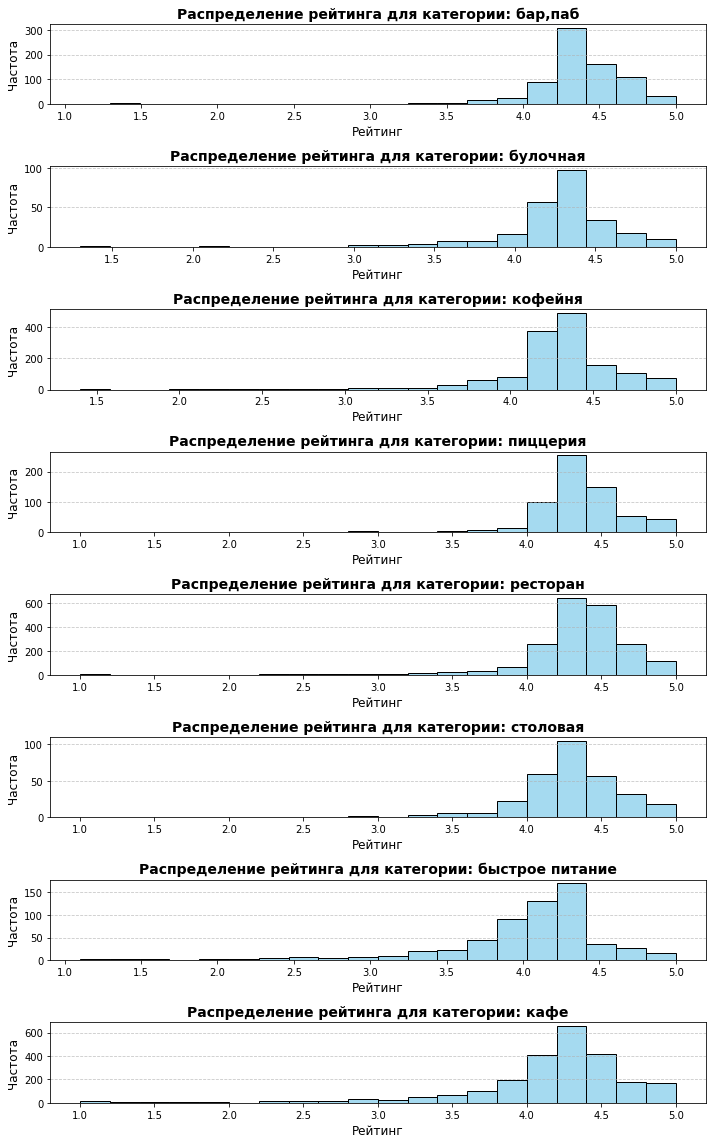

In [44]:
n_cols = len(rating_by_category.index)
fig, axes = plt.subplots(n_cols, 1, figsize=(10, 2 * n_cols))
if n_cols == 1:
    axes = [axes]

for i, col in enumerate(rating_by_category.index):
    ax = axes[i]
    sns.histplot(df[df['category'] == col]['rating'], bins=20, color='skyblue', ax=ax)
    ax.set_title(f'Распределение рейтинга для категории: {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Рейтинг', fontsize=12)
    ax.set_ylabel('Частота', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()

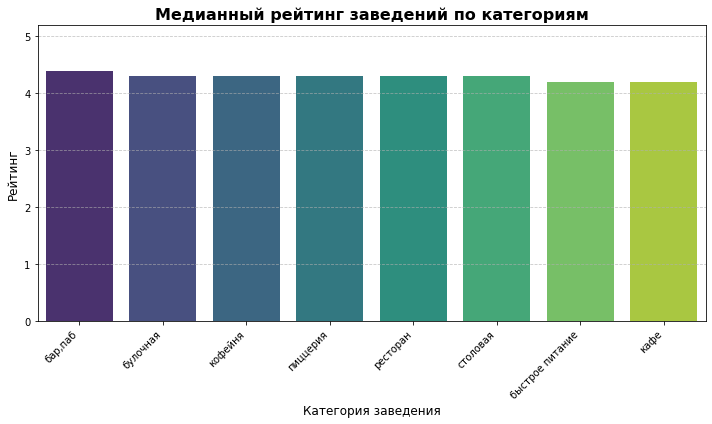

In [45]:
rating_avg_by_category = df.groupby('category')['rating'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='rating', data=rating_avg_by_category, palette='viridis')
plt.title('Медианный рейтинг заведений по категориям', fontsize=16, fontweight='bold')
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 5.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Рейтинг заведений в целом мало зависит от категории: медиана по большинству сегментов держится около **4.2–4.4**.

Заметные отклонения есть только на полюсах:

- **Бары и пабы** — лидеры по качеству восприятия (медиана выше 4.3, основная масса отзывов в диапазоне **4.3–4.6**).  
- **Быстрое питание (фастфуд)** — аутсайдер (медиана ниже 4.2, основная масса в **3.9–4.3**).

Вывод: рынок в целом довольно ровный по восприятию качества, но бары/пабы объективно выделяются в лучшую сторону, а фастфуд — в худшую.  
Это важно учитывать при выборе формата: если хочешь высокий средний рейтинг «из коробки» — бар/паб даёт преимущество, если готов конкурировать в низком сегменте — фастфуд требует очень сильной дифференциации.

---
<a id="step3_6"></a>
### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [46]:
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats', 'price','is_24_7']].phik_matrix()
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']


,rating
price,0.262056
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


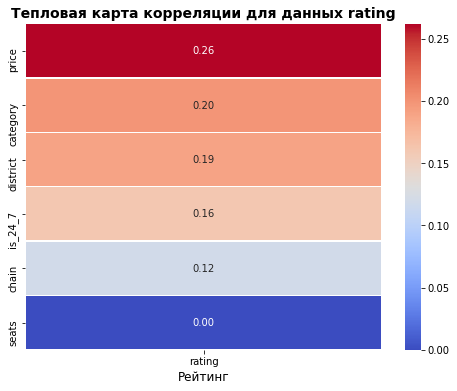

In [47]:
plt.figure(figsize = (8, 6))
corr_matrix = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data = corr_matrix,
           annot = True,
           fmt = '.2f',
           cmap = 'coolwarm',
           linewidths = 0.5,
           )
plt.title('Тепловая карта корреляции для данных rating', fontsize=14, fontweight='bold')
plt.xlabel('Рейтинг',  fontsize=12)
plt.show()

In [48]:
df.groupby('price')['rating'].mean().sort_values()

price
низкие           4.173077
средние          4.297874
выше среднего    4.386348
высокие          4.436611
Name: rating, dtype: float32

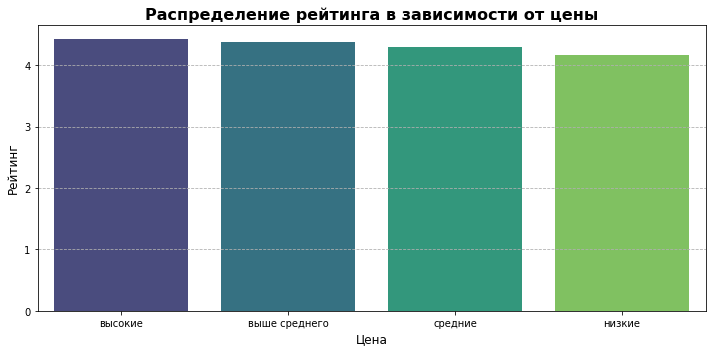

In [49]:
rating_by_price_order = df.groupby('price')['rating'].mean().sort_values(ascending=False).index
    
plt.figure(figsize=(10,5))
sns.barplot(x='price', y='rating',data=df, order=rating_by_price_order, palette='viridis', ci=None)
plt.title('Распределение рейтинга в зависимости от цены', fontsize=16, fontweight='bold')
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Более высокие ценовые категории обычно подразумевают значительные вложения в интерьер, сервис, персонал и качество блюд.  
Такие заведения чаще стремятся к стабильному клиентскому опыту и высоким стандартам обслуживания — именно поэтому их рейтинги в среднем выше.  
Рост среднего рейтинга вместе с ростом ценовой категории выглядит ожидаемым и полностью соответствует рыночным паттернам.

---
<a id="step3_7"></a>
### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [50]:
chain_top = df[df['chain'] == 1]
top_chains = (
    chain_top
    .groupby(['name', 'category'])
    .agg(
        count=('id', 'count'),
        avg_rating=('rating', 'mean')
    )
    .sort_values(by='count', ascending=False)
    .head(15)
).reset_index()
top_chains = top_chains.rename(columns={
    'name': 'Название',
    'category': 'Категория',
    'count': 'Количество заведений',
    'avg_rating': 'Средний рейтинг',
})
top_chains

,Название,Категория,Количество заведений,Средний рейтинг
0,шоколадница,кофейня,119,4.178151
1,домино'с пицца,пиццерия,76,4.169737
2,додо пицца,пиццерия,74,4.286487
3,one price coffee,кофейня,71,4.064789
4,яндекс лавка,ресторан,69,3.872464
5,cofix,кофейня,65,4.075385
6,prime,ресторан,49,4.114285
7,кофепорт,кофейня,42,4.147619
8,кулинарная лавка братьев караваевых,кафе,39,4.394872
9,теремок,ресторан,36,4.105556


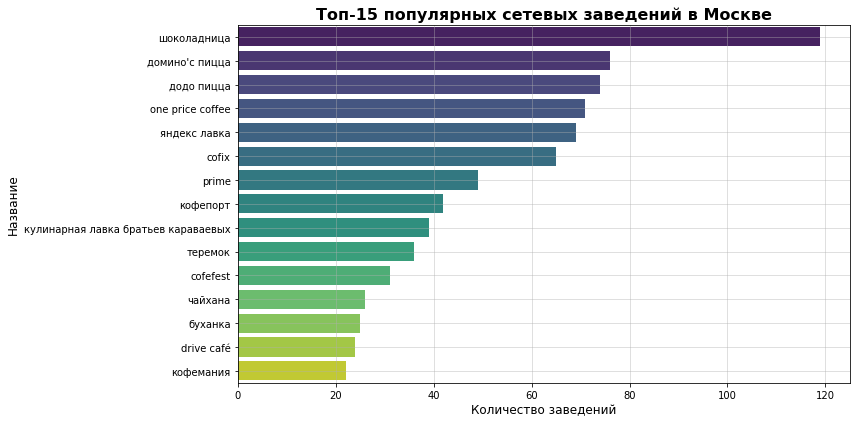

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Количество заведений', y='Название',data=top_chains, palette='viridis')
plt.title('Топ-15 популярных сетевых заведений в Москве', fontsize=16, fontweight='bold')
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Название', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [52]:
order_top_chain = top_chains.groupby('Категория')['Название'].count().sort_values(ascending=False).reset_index()
order_top_chain.columns = ['Категория', 'Количество заведений']
order_top_chain

,Категория,Количество заведений
0,кофейня,6
1,кафе,3
2,ресторан,3
3,пиццерия,2
4,булочная,1


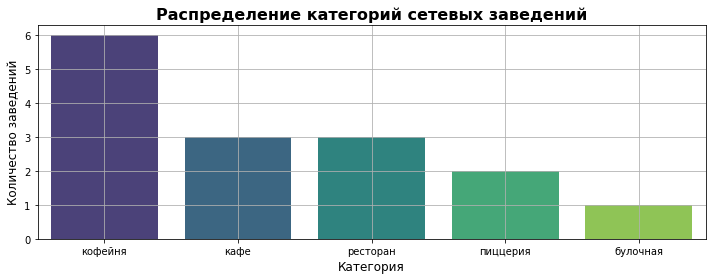

In [53]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Категория', y='Количество заведений', order=order_top_chain['Категория'], data=order_top_chain, palette='viridis', ci=None)
plt.title('Распределение категорий сетевых заведений', fontsize=16, fontweight='bold')
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

**Топ-15 самых популярных сетей Москвы по количеству заведений**

Популярность измеряется числом точек сети в датасете.  
Данные отсортированы по убыванию количества заведений.

- Лидер — **Шоколадница** (119 точек, рейтинг 4.18)  
- Самые рейтинговые сети в топе — **кофемания** (4.46) и **буханка** (4.42)  
- Кофейни занимают 7 позиций из 15 — самый массовый формат сетевого общепита в Москве  
- Средний рейтинг по топ-15 — около 4.1–4.2, разброс от 3.87 до 4.46

---
<a id="step3_8"></a>
### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [54]:
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053650
std       1009.732849
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

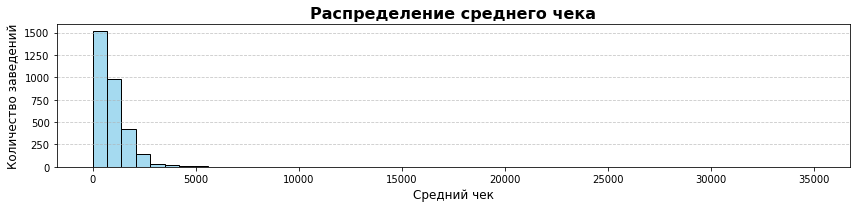

In [55]:
plt.figure(figsize=(12, 3))
sns.histplot(df['middle_avg_bill'], bins=50, color='skyblue')
plt.locator_params(axis='x', nbins=10)
plt.title('Распределение среднего чека', fontsize=16, fontweight='bold')
plt.xlabel('Средний чек', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

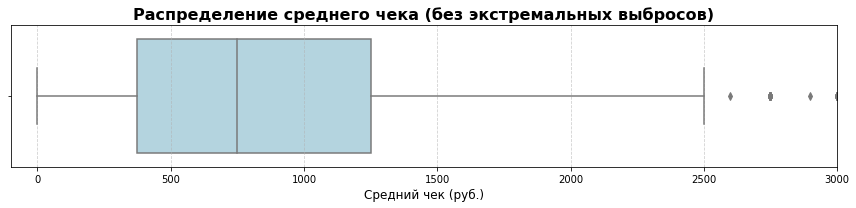

In [56]:
plt.figure(figsize=(12, 3))  # чуть шире, чтобы было комфортнее смотреть

sns.boxplot(x=df['middle_avg_bill'], color='lightblue',linewidth=1.5)
plt.xlim(-100, 3000)
plt.title('Распределение среднего чека (без экстремальных выбросов)', fontsize=16, fontweight='bold')
plt.xlabel('Средний чек (руб.)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Гистограмма среднего чека показывает сильную правостороннюю асимметрию.

Большинство заведений сосредоточено в диапазоне **300–1500 руб.**, с ярко выраженным пиком около **700 руб.** — это основной массовый сегмент (кофейни, фастфуд, небольшие кафе, столовые).

При этом присутствует длинный правый «хвост» — небольшое количество заведений с очень высоким чеком (3000–10 000+ руб.), которые заметно смещают среднее значение вверх относительно медианы.

In [57]:
district_stats = df.groupby('district')['middle_avg_bill'].describe().sort_values(by='mean', ascending=False).reset_index()
district_stats

,district,count,mean,std,min,25%,50%,75%,max
0,Центральный административный округ,1060.0,1191.057495,920.014709,0.0,500.00,1000.0,1500.0,7250.0
1,Западный административный округ,306.0,1053.225464,779.008484,50.0,427.50,1000.0,1500.0,5250.0
2,Северный административный округ,322.0,927.959656,912.609192,130.0,350.00,650.0,1250.0,11000.0
3,Южный административный округ,314.0,834.398071,2008.640625,100.0,350.00,500.0,1037.5,35000.0
4,Северо-Западный административный округ,157.0,822.222900,595.055237,120.0,340.00,700.0,1100.0,2900.0
5,Восточный административный округ,260.0,820.626953,850.903320,50.0,338.00,575.0,1100.0,10000.0
6,Юго-Западный административный округ,235.0,792.561707,559.173096,100.0,350.00,600.0,1100.0,2750.0
7,Северо-Восточный административный округ,301.0,716.611267,591.232117,50.0,325.00,500.0,950.0,4500.0
8,Юго-Восточный административный округ,194.0,654.097961,566.825684,30.0,281.25,450.0,887.5,3750.0


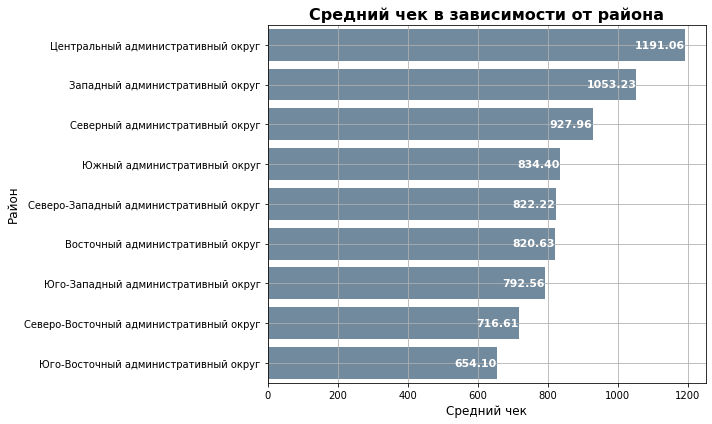

In [58]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    y='district',
    x='mean',
    data=district_stats,
    color='#6B8BA4'
)
plt.title('Средний чек в зависимости от района', fontsize=16, fontweight='bold')
plt.xlabel('Средний чек', fontsize=12)
plt.ylabel('Район', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()
for i, value in enumerate(district_stats['mean']):
    ax.text(value, i, f'{value:.2f}', va='center', ha='right', fontsize=11, color='white', fontweight='bold')
plt.show()

In [65]:
avg_bill_pivot = df.pivot_table(index='district', columns='category', values='middle_avg_bill', aggfunc='mean')
avg_bill_pivot

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный административный округ,1209.038452,263.888885,831.727295,607.941162,486.111115,700.734680,1221.455933,364.700012
Западный административный округ,1305.555542,723.125000,432.333344,826.838684,694.444458,905.071411,1478.232788,565.000000
Северный административный округ,1572.810791,625.000000,327.130432,723.823547,495.736847,722.618164,1312.781250,337.500000
Северо-Восточный административный округ,986.913025,515.714294,435.655182,673.701294,433.157898,579.463440,1024.571411,325.238098
Северо-Западный административный округ,1057.142822,200.000000,295.000000,797.968750,440.636353,682.583313,1235.833374,298.636353
Центральный административный округ,1479.739868,1237.916626,532.081604,765.176208,794.764709,1104.839478,1561.059082,319.886353
Юго-Восточный административный округ,1043.181763,375.000000,479.142853,589.210510,263.000000,561.599976,931.629639,288.928558
Юго-Западный административный округ,995.526306,556.666687,411.315796,594.655151,381.818176,786.657166,1117.359009,311.666656
Южный административный округ,1079.107178,458.333344,376.923065,696.532288,504.777771,662.930237,1393.333374,291.392853


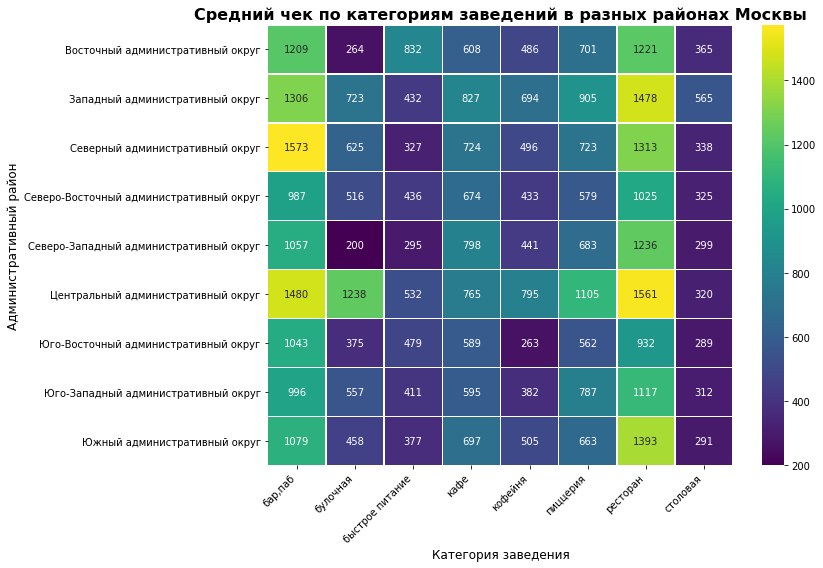

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(avg_bill_pivot, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
plt.title('Средний чек по категориям заведений в разных районах Москвы', fontsize=16, fontweight='bold')
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Административный район', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Выводы по среднему чеку в зависимости от района и категории**

Анализ среднего чека выявил чёткую зависимость от локации и формата заведения:

1. **Центральный административный округ (ЦАО)** доминирует по уровню чека практически во всех категориях. Особенно это заметно в ресторанах, барах/пабах и кафе — здесь средний чек стабильно выше, чем в остальных округах. Причина: высокая аренда, туристы, более платёжеспособная аудитория и престиж локации.

2. **Западный и Северный округа** занимают второе место — здесь чек тоже выше среднего, особенно в ресторанах и барах. Это связано с развитой инфраструктурой и жилыми кварталами с высоким доходом.

3. **Восточные, Юго-Восточные и Северо-Восточные округа** показывают самые низкие значения — особенно в столовых, фастфуде и булочных. Аудитория здесь более чувствительна к цене, конкуренция выше, а покупательная способность ниже.

4. **Самые дорогие категории** — рестораны и бары/пабы (во всех округах). Это форматы с более сложной кухней, обслуживанием и алкоголем.

5. **Самые доступные** — булочные, столовые и фастфуд. Их концепция изначально ориентирована на быстрый оборот и массового потребителя.

6. **Удалённость от центра** напрямую влияет на ценовую политику: средний чек снижается по мере удаления от ЦАО (в спальных районах на 30–60% ниже). Это классическая картина Москвы: центр позволяет ставить выше цены, периферия — вынуждена конкурировать низким чеком.

В целом рынок общепита Москвы чётко сегментирован по цене и географии.  

---
<a id="step3_9"></a>
### Промежуточный вывод

Анализ рынка общественного питания Москвы выявил следующие ключевые закономерности:

- **Структура рынка**: лидируют кафе (2376 объектов) и рестораны (2042 объекта).  
- **География**: ЦАО резко выделяется — здесь максимальная концентрация заведений, особенно ресторанов (670 объектов), в то время как по городу в целом доминируют кафе.  
- **Сетевые форматы**: наиболее «сетевыми» являются булочные (≈61% сетевых), пиццерии (≈52%) и кофейни (≈51%). Кофейни — самый массовый сетевой формат в городе.  
- **Посадочные места**: распределение похоже во всех категориях, но в каждой группе есть заметные выбросы в сторону крупных залов (рестораны, фуд-корты, столовые в ТЦ).  
- **Рейтинг**: слабо зависит от категории — медиана по большинству сегментов держится около 4.2–4.3. Однако заметно выше у баров/пабов и ниже у фастфуда.  
- **Ценовой сегмент**: чем выше ценовая категория — тем выше средний рейтинг. Это ожидаемо: больше инвестиций в сервис и качество → выше удовлетворённость гостей.  
- **Средний чек**: самый высокий в ЦАО (особенно в ресторанах, барах и кафе). По мере удаления от центра чек падает — в спальных округах (ЮВАО, СВАО, ВАО) он в среднем на 30–60% ниже.  

Общая картина рынка: сильная географическая поляризация (центр vs периферия), доминирование кофеен и кафе, высокая доля сетей в самых масштабируемых форматах и чёткая связь цены с воспринимаемым качеством.

<a id="step4"></a>
## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

**Проделанная работа**  
Проанализировано 8406 заведений общепита Москвы. Изучены структура рынка, география, сетевые форматы, посадочные места, рейтинги, цены и их зависимости от категории и локации.

**Главные выводы**  
- Рынок сильно поляризован: **ЦАО** — перенасыщен (2242 заведения) и самый дорогой (самый высокий средний чек). Спальные округа (ЮВАО, СВАО, ВАО) — дешевле на 30–60 %.  
- Лидеры по количеству — **кафе и рестораны**. Самые сетевые категории — **булочные (61 %), пиццерии (52 %), кофейни (51 %)**.  
- Рейтинг слабо зависит от категории (медиана ≈4.2–4.3), но бары/пабы стабильно выше, фастфуд — ниже. Выше ценовая категория — выше рейтинг.  
- Посадочные места имеют правостороннюю асимметрию (много выбросов в сторону крупных залов), но медиана по категориям сильно различается (кофейни/булочные 30–50, рестораны 80–150).  

**Рекомендации для открытия нового заведения**  

1. **Бар/паб в Северном административном округе (САО)**  
   - Высокие рейтинги у баров/пабов (4.3–4.6).  
   - В САО высокий средний чек для этой категории (≈1573 руб.).  
   - Конкуренция ниже, чем в ЦАО (898 заведений против 2242).  
   → Возможность занять нишу с платёжеспособной аудиторией и меньшим давлением сетей.

2. **Премиум-булочная в ЦАО**  
   - В ЦАО крайне мало булочных → низкая конкуренция в категории.  
   - Средний чек в ЦАО для булочных ≈1238 руб. (на 400–600 руб. выше, чем в спальных районах).  
   - Возможность позиционировать как премиум-формат с акцентом на качество и локацию.  
   → Шанс на высокий чек при относительно небольшом количестве конкурентов.

**Заключение**  
Успех заведения определяется не только продуктом, но и точным выбором локации + ценового позиционирования.  
ЦАО — для премиум-формата и высокого чека. Спальные районы — для массового потока и низкого чека.  
Рекомендуется выбрать один из двух предложенных вариантов в зависимости от бюджета, амбиций и готовности к конкуренции.